<a href="https://colab.research.google.com/github/rifaa14/bigdata/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Linear Regression

In [18]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [19]:
#import dataset
dataset = pd.read_csv("/content/prices-split-adjusted.csv.zip")
dataset.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [20]:
#cek jumlah dataset
print(str(len(dataset.index)))

851264


In [21]:
#analisis deskriptif dataset
dataset.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


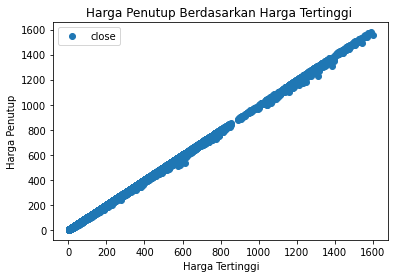

In [22]:
#menampilkan grafik plot, koordinat x = harga tertinggi dan koordinat y=harga penutup
dataset.plot(x='high', y='close', style='o')
plt.title('Harga Penutup Berdasarkan Harga Tertinggi ')
plt.xlabel('Harga Tertinggi')
plt.ylabel('Harga Penutup')
plt.show()

In [23]:
datasets = dataset[["close", "high"]]
datasets.head()

,close,high
0,125.839996,126.250000
1,119.980003,125.540001
2,114.949997,119.739998
3,116.620003,117.440002
4,114.970001,117.330002


In [24]:
#menentukan variabel independen (sumbu X) Harga Tertinggi dan menentukan variabel dependen (sumbu Y) Harga Penutup
x = datasets.iloc[:,:-1].values
y = datasets.iloc[:, 1].values

In [25]:
#pembagian data menjadi dua bagian untuk data training (training set) dan data test (test set)
#80% untuk data training dan 20% untuk data test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

### Simple Linear Regression

In [26]:
#import class LinearRegression dari library sklearn.linear_model untuk membuat model regresi
#membuat objek regressor sebagai fungsi dari LinearRegression 
#membuat model regresi untuk data training dengan menuliskan regressor.fit(x_train, y_train)
from sklearn.linear_model import LinearRegression
lireg=LinearRegression() # initialize the model
lireg.fit(x_train,y_train) # fit he model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
#melakukan prediksi
y_pred=lireg.predict(x_test)
dataframe = pd.DataFrame({'Data Sebenarnya' : y_test, 'Data Prediksi' : y_pred})
dataframe

,Data Sebenarnya,Data Prediksi
0,45.799999,45.835434
1,64.690002,65.202844
2,111.779999,111.718933
3,41.000000,41.112168
4,42.439999,42.817795
...,...,...
170248,40.650002,41.041521
170249,83.480003,83.561002
170250,47.709999,47.954851
170251,71.379997,71.742746


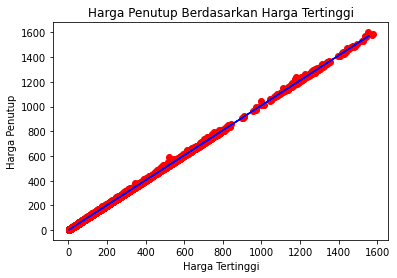

In [28]:
#visualisasi hasil test set
%matplotlib inline
from matplotlib import pyplot as plt
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, lireg.predict(x_train), color = 'blue' )
plt.title('Harga Penutup Berdasarkan Harga Tertinggi')
plt.xlabel('Harga Tertinggi')
plt.ylabel('Harga Penutup')
plt.show()

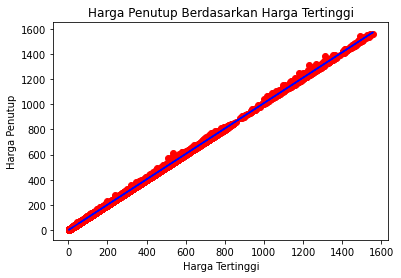

In [29]:
#visualisasi hasil Training Set
%matplotlib inline
from matplotlib import pyplot as plt
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lireg.predict(x_train), color = 'blue' )
plt.title('Harga Penutup Berdasarkan Harga Tertinggi')
plt.xlabel('Harga Tertinggi')
plt.ylabel('Harga Penutup')
plt.show()

### Multiple linear regression

In [30]:
#membuat model multiple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#membuat prediksi hasil test set
#membandingkan nilai test set dengan nilai prediksi
y_pred = regressor.predict(x_test)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,45.799999,45.835434
1,64.690002,65.202844
2,111.779999,111.718933
3,41.000000,41.112168
4,42.439999,42.817795
...,...,...
170248,40.650002,41.041521
170249,83.480003,83.561002
170250,47.709999,47.954851
170251,71.379997,71.742746


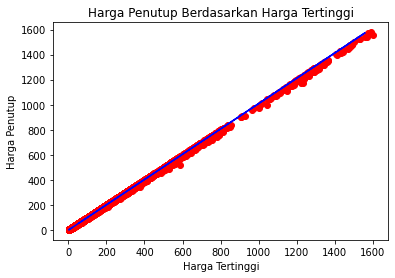

In [32]:
#visualisasi hasil test set
%matplotlib inline
from matplotlib import pyplot as plt
plt.scatter(y_test, x_test[:,0], color ='red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue' )
plt.title('Harga Penutup Berdasarkan Harga Tertinggi')
plt.xlabel('Harga Tertinggi')
plt.ylabel('Harga Penutup')
plt.show()

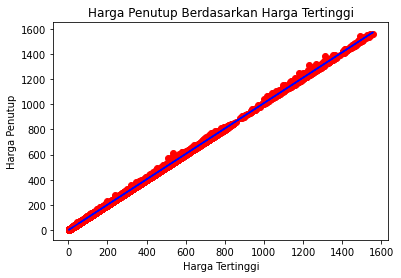

In [33]:
#visualisasi hasil Training Set
%matplotlib inline
from matplotlib import pyplot as plt
plt.scatter(x_train[:,0], y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue' )
plt.title('Harga Penutup Berdasarkan Harga Tertinggi')
plt.xlabel('Harga Tertinggi')
plt.ylabel('Harga Penutup')
plt.show()